# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [39]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
from selenium import webdriver

In [40]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [41]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
driver = webdriver.Chrome()
driver.get(url)
html_content = driver.page_source

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [42]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html_content, 'html.parser')
table = soup.find('table')

In [43]:
# Extract all rows of data
data = []
rows = table.find_all('tr')
headers = [header.text.strip() for header in rows[0].find_all('th')]
data.append(headers)

for row in rows[1:]:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append(cols)

# 'data' now contains all the rows of the table
for row in data:
    print(row)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', 

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [44]:
# Create an empty list
rows_list = []

# Loop through the scraped data to create a list of rows
table = soup.find('table')  # or use more specific criteria to find the table

# Iterate through each row in the table
for row in table.find_all('tr'):
    # Find all data cells within the row; this will be either 'td' or 'th' tags
    cells = row.find_all(['td', 'th'])  
    # Extract the text from each cell
    row_data = [cell.get_text(strip=True) for cell in cells]
    # Append this row of data to the list
    rows_list.append(row_data)


In [45]:
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [46]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(rows_list, columns=column_names)

In [47]:
# Confirm DataFrame was created successfully
print(df.head())

   id  terrestrial_date  sol   ls  month  min_temp  pressure
0  id  terrestrial_date  sol   ls  month  min_temp  pressure
1   2        2012-08-16   10  155      6     -75.0     739.0
2  13        2012-08-17   11  156      6     -76.0     740.0
3  24        2012-08-18   12  156      6     -76.0     741.0
4  35        2012-08-19   13  157      6     -74.0     732.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [48]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [49]:
# Change data types for data analysis
import pandas as pd

# Example DataFrame
data = {
    'Column1': ['1', '2', '3'],  # Currently as strings
    'Column2': ['1.1', '2.2', '3.3'],  # Currently as strings
    'DateColumn': ['2021-01-01', '2021-01-02', '2021-01-03']  # Dates as strings
}
df = pd.DataFrame(data)

# Converting data types
df['Column1'] = df['Column1'].astype(int)
df['Column2'] = df['Column2'].astype(float)
df['DateColumn'] = pd.to_datetime(df['DateColumn'])

# Check new data types
print(df.dtypes)


Column1                int64
Column2              float64
DateColumn    datetime64[ns]
dtype: object


In [50]:
# Confirm type changes were successful by examining data types again
import pandas as pd

# Example DataFrame creation and data type conversion
data = {
    'Column1': ['1', '2', '3'],
    'Column2': ['1.1', '2.2', '3.3'],
    'DateColumn': ['2021-01-01', '2021-01-02', '2021-01-03']
}
df = pd.DataFrame(data)

df['Column1'] = df['Column1'].astype(int)
df['Column2'] = df['Column2'].astype(float)
df['DateColumn'] = pd.to_datetime(df['DateColumn'])

# Confirm type changes
print("Data Types After Conversion:")
print(df.dtypes)


Data Types After Conversion:
Column1                int64
Column2              float64
DateColumn    datetime64[ns]
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [56]:
# 1. How many months are there on Mars?
# Replace this with the actual path to your dataset or the code to scrape the data
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
dfs = pd.read_html(url)  # This returns a list of all tables found in the HTML

df = dfs[0]

# Then, use the correct column name for Martian months
# Replace 'Actual_Martian_Month_Column' with the correct column name
number_of_martian_months = df['month'].nunique()
print(f"Number of unique Martian months in the dataset: {number_of_martian_months}")


Number of unique Martian months in the dataset: 12


In [57]:
# 2. How many Martian days' worth of data are there?
import pandas as pd

# Assuming you have already created a DataFrame 'df' from your data
# Replace 'Sol_Column_Name' with the actual name of the column in your dataset that represents Martian days
number_of_martian_days = df['sol'].nunique()
print(f"Number of Martian days (sols) in the dataset: {number_of_martian_days}")


Number of Martian days (sols) in the dataset: 1867


In [60]:
# 3. What is the average low temperature by month?
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')

# Group by month and calculate the mean of the minimum temperature
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()

print(average_low_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


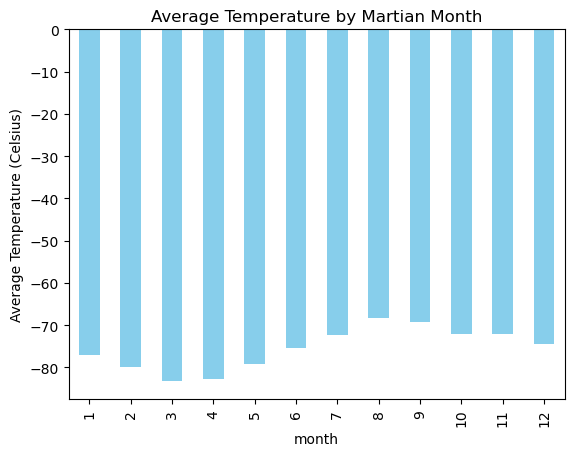

In [65]:
# Plot the average temperature by month
average_temps = df.groupby('month')['min_temp'].mean()
# Plotting the average temperatures
average_temps.plot(kind='bar', color='skyblue')
plt.title('Average Temperature by Martian Month')
plt.xlabel('month')
plt.ylabel('Average Temperature (Celsius)')
plt.show()


In [67]:
# Identify the coldest and hottest months in Curiosity's location
average_min_temp_by_month = df.groupby('month')['min_temp'].mean()
# Find the month with the lowest average temperature
coldest_month = average_min_temp_by_month.idxmin()
coldest_temp = average_min_temp_by_month.min()

# Find the month with the highest average temperature
hottest_month = average_min_temp_by_month.idxmax()
hottest_temp = average_min_temp_by_month.max()

print(f"The coldest month is {coldest_month} with an average temperature of {coldest_temp}°C.")
print(f"The hottest month is {hottest_month} with an average temperature of {hottest_temp}°C.")


The coldest month is 3 with an average temperature of -83.30729166666667°C.
The hottest month is 8 with an average temperature of -68.38297872340425°C.


In [69]:
# 4. Average pressure by Martian month
average_pressure_by_month = df.groupby('month')['pressure'].mean()
print(average_pressure_by_month)


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


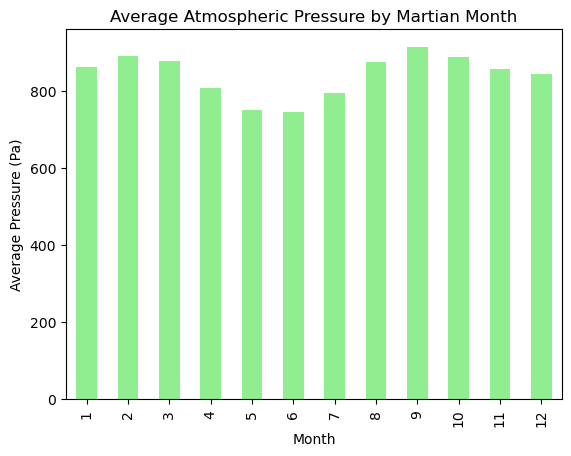

In [70]:
# Plot the average pressure by month
import matplotlib.pyplot as plt

# Plotting the average pressure
average_pressure_by_month.plot(kind='bar', color='lightgreen')
plt.title('Average Atmospheric Pressure by Martian Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pa)')
plt.show()


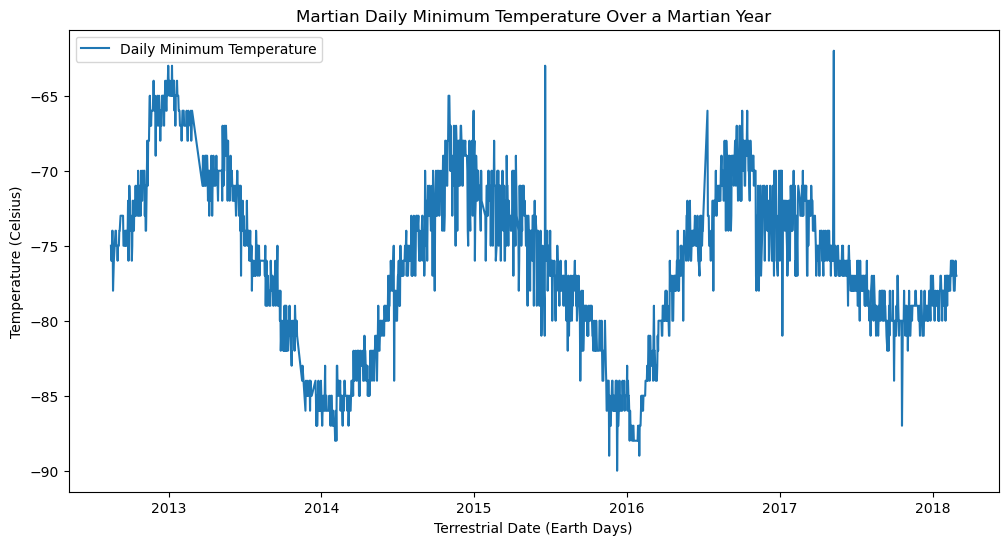

In [77]:
# 5. How many terrestrial (earth) days are there in a Martian year?
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a column 'Min_Temp' for minimum temperature
# and 'Terrestrial_Date' for the Earth date

# Convert 'Terrestrial_Date' to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['terrestrial_date'], df['min_temp'], label='Daily Minimum Temperature')
plt.title('Martian Daily Minimum Temperature Over a Martian Year')
plt.xlabel('Terrestrial Date (Earth Days)')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [78]:
# Write the data to a CSV
df.to_csv('output_filename.csv', index=False)


In [79]:
browser.quit()